# Neil Shah: CUNY 621 Blog 2

# Is there a relationship?

In my previous [blog post](https://github.com/shahneilp/DATA621-Blogs/blob/master/Blog1-Normality-Finished.ipynb) I discussed the properties of a Normal distribution and how to check if your data is normally distributed. I demonstrated graphically and through a statistical test (Shapiro) on a set of normally distributed data--that proved of course to be normally distributed--and also on a pricing data set I was studying, which wasn't normally distributed.

In this blog I want to show how to investigate whether two variables have a relationship!

In [1]:
#Importing our friends 
import statsmodels.api as sm
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [10]:
#Loading my set of prices to study:
ethanol=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/sampledata.csv',header=0,index_col=0,parse_dates=True)
ethanol.head()

,1
Date,
2019-01-04,1.2775
2019-01-07,1.2625
2019-01-08,1.2525
2019-01-09,1.2650
2019-01-10,1.2600


This data set is that of Ethanol prices which is blended into Gasoline for automobiles. Let's take a look at it. 

(array([737060., 737119., 737180., 737241., 737303., 737364., 737425.,
        737485., 737546., 737607., 737669.]),
 <a list of 11 Text major ticklabel objects>)

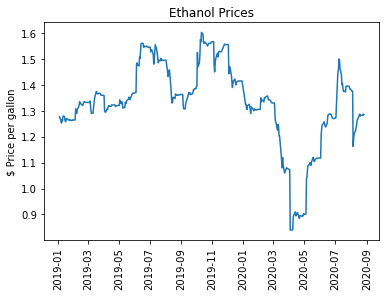

In [14]:
plt.plot(ethanol)
plt.title('Ethanol Prices')
plt.ylabel('$ Price per gallon')
plt.xticks(rotation='vertical')

Looks like prices were steady up until well 03-2020 and then crashed...I wonder if anything happened this year in March..

Oh wait-a **pandemic**

Now I mentioned before that ethanol is blended into gasoline--and thus a component of it--so the question is

**Is there a relationship between ethanol prices and gasoline?**

First let's start by loading a set of gasoline prices--and plot it 

In [30]:
gasoline=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/blog2sample.csv',header=0,index_col=0,parse_dates=True)
gasoline.head()

,1
Date,
2019-01-02,1.5037
2019-01-03,1.5310
2019-01-04,1.5455
2019-01-07,1.5437
2019-01-08,1.5663


(array([737060., 737119., 737180., 737241., 737303., 737364., 737425.,
        737485., 737546., 737607., 737669.]),
 <a list of 11 Text major ticklabel objects>)

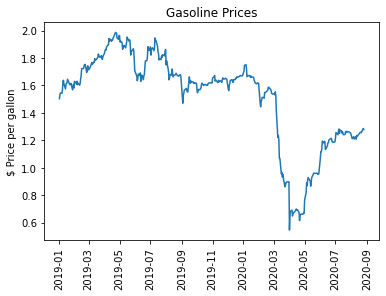

In [31]:
plt.plot(gasoline)
plt.title('Gasoline Prices')
plt.ylabel('$ Price per gallon')
plt.xticks(rotation='vertical')

Interesting--we see the same trend here with gasoline prices--they were steady up until the pandemic! Let's plot them together.

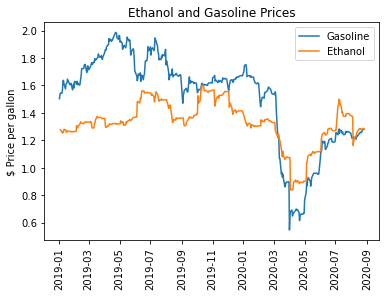

In [32]:
plt.plot(gasoline,label='Gasoline')
plt.plot(ethanol,label='Ethanol')
plt.title('Ethanol and Gasoline Prices')
plt.ylabel('$ Price per gallon')
plt.xticks(rotation='vertical')
plt.legend()

So graphically--it looks like there **is** something? They seem to be following the same trend--maybe the economic thesis that these two commodities are linked? Well once way to investigate bivariate plots is through a scatter plot. 

Let's do that

Text(0.5, 0, 'Gasoline')

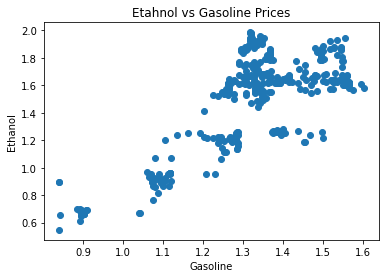

In [47]:
#Plotting them both but truncating gasoline by 4 so the values line up
plt.scatter(ethanol.values,gasoline[:-4].values)
plt.title('Etahnol vs Gasoline Prices')
plt.ylabel('Ethanol')
plt.xlabel('Gasoline')

Graphically there seems to be a relationship between these two commodity prices--in fact looking from the upword sloping direction could point to a linear relationship--and maybe a regression model would be appropriate? Before we get too excited let's calculate the pearson correlation between these two variables, which is a measure of linearity. 

In [43]:
#I'm going to make a single dataframe to make my life easier

df=pd.DataFrame(data=ethanol.copy())
df['Gasoline']=gasoline
df.columns=['Ethanol','Gasoline']
df.head()

,Ethanol,Gasoline
Date,,
2019-01-04,1.2775,1.5455
2019-01-07,1.2625,1.5437
2019-01-08,1.2525,1.5663
2019-01-09,1.2650,1.6316
2019-01-10,1.2600,1.6375


In [46]:
df.corr(method='pearson')

,Ethanol,Gasoline
Ethanol,1.000000,0.750663
Gasoline,0.750663,1.000000


Well look at that--0.75 is pretty high and points to not just a positive but strong positive relationship. But one caveat--both of these data sets are time-series and thus this correlaton is over the entire time frame. Now in most price time series the relationship ebbs and flows so let's see how the correlation evolves with time.

What we'll calculate is varioius rollng correlations--which are taken over various windows or lagging day ranges. Let's do 30 days, 60 days and 90 days!

(array([737119., 737180., 737241., 737303., 737364., 737425., 737485.,
        737546., 737607., 737669.]),
 <a list of 10 Text major ticklabel objects>)

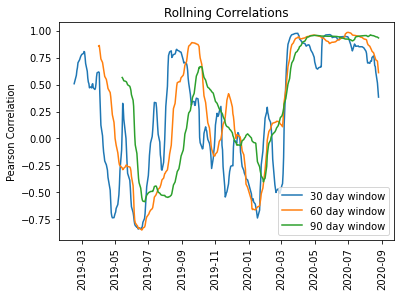

In [57]:
plt.plot((df['Ethanol'].rolling(30).corr(df['Gasoline'])).dropna(),label='30 day window')
plt.plot((df['Ethanol'].rolling(60).corr(df['Gasoline'])).dropna(),label='60 day window')
plt.plot((df['Ethanol'].rolling(90).corr(df['Gasoline'])).dropna(),label='90 day window')
plt.title('Rolling Correlations')
plt.ylabel('Pearson Correlation')
plt.legend(loc='lower right')
plt.xticks(rotation='vertical')

Now this is very enlightening--while the correlation over the entire data range is positive and strong, we see that the actual correlation varies with time and actually fluctuates from highly correlated, to none to negative! This reflects a change in the relationship that can't be explained right now but it highlights the importance of choosing the data. Had we chosen data around end of 2019 the relationship was positive, while earlier it was negative!

Good thing we aren't activiely trading this because our model would be invalid!

Now one this is that interesting is that after 03-2020 (Pandemic) all the correlations remain positive--perhaps that could be the basis for a model...maybe regression?

Next time!